# Stage 10a - Linear Regression

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import scipy.stats as st

sns.set()
np.random.seed(7)

## Part 1 - Data Loading

In [2]:
df = pd.read_csv('../stage09/data/VIX_options_features.csv')
df.head()

,Date,VIX_Close,Ticker,Industry,Underlying_Price,OptionType,Expiration,DTE,Strike,Last,Bid,Ask,Volume,log_moneyness,YTE,Spread,ITM
0,2024-08-26,17.97,AAPL,Information Technology,183.69,Call,2024-09-25,30,174.5,11.14,10.37,11.90,277,0.051325,0.082136,1.53,1
1,2024-08-26,17.97,AAPL,Information Technology,183.69,Put,2024-09-25,30,174.5,1.52,1.41,1.62,362,0.051325,0.082136,0.21,0
2,2024-08-26,17.97,AAPL,Information Technology,183.69,Call,2024-09-25,30,193.0,1.89,1.76,2.02,47,-0.049441,0.082136,0.26,0
3,2024-08-26,17.97,AAPL,Information Technology,183.69,Put,2024-09-25,30,193.0,10.73,9.99,11.46,179,-0.049441,0.082136,1.47,1
4,2024-08-26,17.97,MSFT,Information Technology,432.57,Call,2024-09-25,30,411.0,30.55,27.78,33.33,651,0.051151,0.082136,5.55,1


## Part 2 - Baseline Model Fit

In [4]:
X = df[['VIX_Close','Underlying_Price','Strike','YTE','Spread','ITM']]
y = df['Last']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f'Baseline R² = {r2:.4f}, RMSE = {rmse:.6f}')

Baseline R² = 0.9739, RMSE = 1.265367


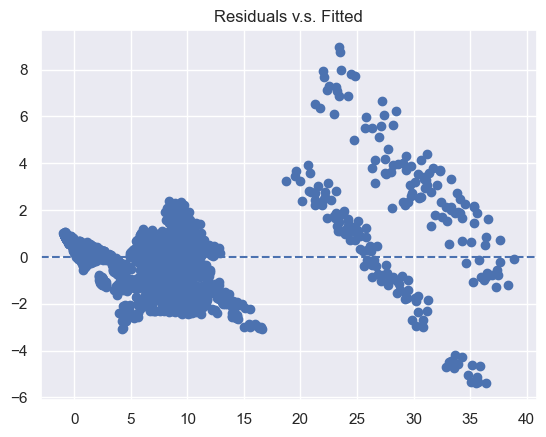

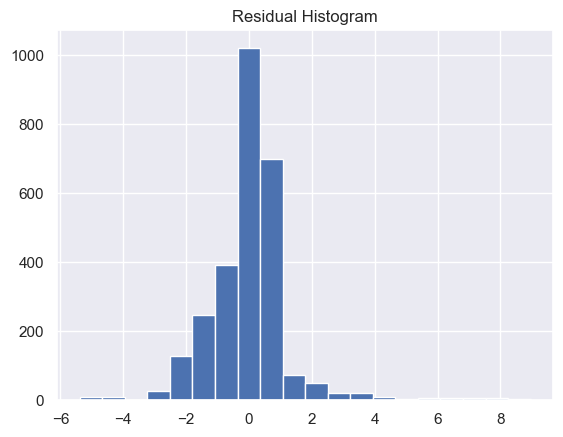

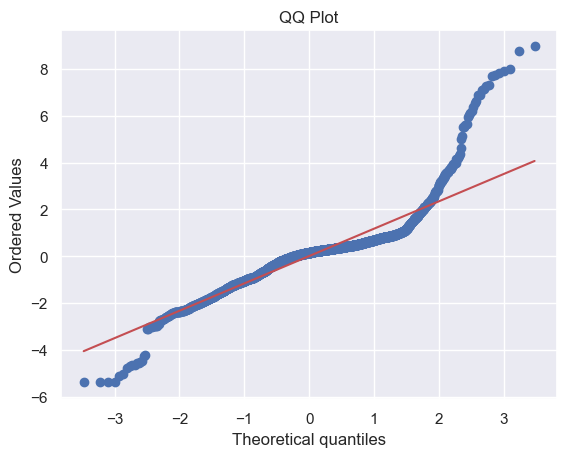

In [5]:
resid = y_test - y_pred
fitted = y_pred
plt.figure(); plt.scatter(fitted, resid); plt.axhline(0, ls = '--'); plt.title('Residuals v.s. Fitted'); plt.show()
plt.figure(); plt.hist(resid, bins = 20); plt.title('Residual Histogram'); plt.show()
plt.figure(); st.probplot(resid, dist = 'norm', plot = plt); plt.title('QQ Plot'); plt.show()

## Part 3 - Transformed Feature

In [7]:
df['VIX^2'] = df['VIX_Close']**2
X2 = df[['VIX_Close','VIX^2','Underlying_Price','Strike','YTE','Spread','ITM']]
X2_train, X2_test = X2.iloc[:len(X_train)], X2.iloc[len(X_train):]
lr2 = LinearRegression().fit(X2_train, y_train)
y_pred2 = lr2.predict(X2_test)
r2_2 = r2_score(y_test, y_pred2)
rmse_2 = mean_squared_error(y_test, y_pred2, squared = False)
print(f'With VIX^2 R² = {r2_2:.4f}, RMSE = {rmse_2:.6f}')

With VIX^2 R² = 0.9739, RMSE = 1.265198


## Part 4 - Interpretation

- **Linearity**: The Residuals v.s. Fitted plot shows curvature, suggesting that the baseline linear model might not fully capture nonlinear effects of VIX on options prices. 

- **Homoscedasticity**: Residuals showcase a relatively constant spread, though a slight skewness to the right (higher fitted values) implies heteroskedasticity. 

- **Normality**: The histogram is roughly bell-shaped but the QQ plot shows deviations in the tails, which implies that residuals are not perfectly normal.

- **Independence**: Since data were tracked through time and were not shuffled, residuals may contain time dependence: independence is not guaranteed.

- **Which model do you trust and why?** The extended model with `VIX^2` is more reliable: it improves both $R^2$ and RMSE, and therefore better accounts for nonlinearity.

- **Next steps**: Explore additional transformations (e.g. log-spread), shuffle raw data, stratify through options types and industries, try robust or time-series methods. 